<a href="https://colab.research.google.com/github/shemanto27/End-to-End-BD-House-Price-Prediction/blob/main/BD_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Data Science Regression Project: Bangladesh's House Price Prediction</h1>

# Step-0: Setup and Project Details 📜


## Projects Details
- Title: Bangladesh House Price Prediction
- Problem Statement:

  The real estate market in Bangladesh is rapidly growing, yet pricing decisions often lack accurate data-driven insights. This project aims to predict house prices using machine learning techniques, helping stakeholders make informed decisions and promoting transparency in the housing market.
  
- Objectives:
  - Predict house prices based on features like location, size, number of rooms, etc.
  - Build a user-friendly interface or API for users to estimate house prices

- Target Audience:
  - Homebuyers
  - Real estate agents
  - Property developers
  - Government and urban planners

- Data Source:
  Data was collected from Kaggle, here is the [link](https://www.kaggle.com/datasets/durjoychandrapaul/house-price-bangladesh)
-About the Dataset:

  This dataset contains property listings from various cities across Bangladesh, specifically including Dhaka, Chattogram, Cumilla, Narayanganj City, and Gazipur, with prices listed in Bangladeshi Taka (৳). The dataset provides valuable insights into various features of the properties, including the number of bedrooms, bathrooms, floor number, floor area in square feet, and their respective prices. The data has been collected from a real estate website, offering a comprehensive view of the housing market across these key cities in Bangladesh.

- Feature Description
  - Title: The title or description of the property listing.

  - Bedrooms: The number of bedrooms in the property.

  - Bathrooms: The number of bathrooms in the property.

  - Floor_no: The floor number on which the property is located.

  - Occupancy_status: Indicates whether the property is vacant or occupied.

  - Floor_area: The total floor area of the property in square feet.

  - City: The city where the property is located. This dataset includes listings from Dhaka, Chattogram, Cumilla, Narayanganj City, and Gazipur.

  - Price_in_taka: The listing price of the property in Bangladeshi Taka (৳).

  - Location: The specific location or address within the city.

## Plan:
- It is a **Regression Problem**
- We will test Regression Algorithms: LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, GradientBoostingRegress
xgboost
- Evaluation Matrics: mean_squared_error, mean_absolute_error, r2_score

## Project setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns

# Set the Seaborn style
sns.set_style("darkgrid")  # You can also use "darkgrid", "white", "ticks"
sns.set_palette("viridis")  # You can also try "rocket", "mako", "flare", "magma", "viridis"


In [ ]:
# # Install MLflow and Pyngrok
# !pip install mlflow -q
# !pip install pyngrok -q

In [ ]:
# import mlflow
# import subprocess
# from pyngrok import ngrok, conf
# import getpass

In [ ]:
# # Define MLflow backend store URI with SQLite
# MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
# # Start the MLflow  using subprocess
# subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

In [ ]:
# # Set the tracking URI
# mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# # Set or create an experiment. mlflow will create an experiment if it doesn't exist
# mlflow.set_experiment("BD House Price Pridiction")

2pYrZiuK7OfKJj0aUqvOAwOCzQL_889Gi4aGbgY5GDJNgKYbP

In [ ]:
# # Configure ngrok and expose the MLflow UI
# print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
# conf.get_default().auth_token = getpass.getpass()
# # Expose the MLflow UI on port 5000
# port=5000
# public_url = ngrok.connect(port).public_url
# print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

https://ed5e-34-85-169-36.ngrok-free.app

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BD House Price Prediction/house_price_bd.csv')

#  Step-1: Data Preprocessing 🧹
- imputation(Handle missing values),Remove duplicates and outliers
- Data Transformation- encoding(Cat-->Num),  Standardization or normalization
- Data Splitting

In [ ]:
df.sample(10)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
856,1274 Sq Ft 3 Bed Apt. Is Available For Sale In...,3.0,3.0,6,vacant,1274.0,dhaka,"৳10,500,000","Block G, Banasree"
1500,In Darussalam This 1485 Sq Feet Flat For Sale,3.0,3.0,8,vacant,1485.0,dhaka,"৳8,167,000","Darussalam, Mirpur"
2774,1275 Square Feet Residential Apartment For Sal...,3.0,3.0,5,vacant,1275.0,chattogram,"৳5,100,000","18 No. East Bakalia Ward, Bakalia"
2147,Suitable Shop In Chandargaon Is For sale,NaN,NaN,1,vacant,175.0,chattogram,"৳3,500,000","Mohara, 4 No Chandgaon Ward"
918,View This 1750 Sq Ft Flat For Sale In South Ba...,3.0,3.0,4,vacant,1750.0,dhaka,"৳11,000,000","South Baridhara Residential Area,D. I. T. Proj..."
3646,A 3 Katha Plot Is Up For Sale In The Beautiful...,NaN,NaN,NaN,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
1270,1000 Sq Ft Commercial Space Is For Sale In Lux...,NaN,NaN,1,vacant,1000.0,dhaka,"৳35,000,000","Luxmibazar, Sutrapur"
1738,Nicely Shaped 1315 Sq Ft - 3 Bedroom Flat Up F...,3.0,3.0,3,vacant,1315.0,chattogram,"৳5,260,000","18 No. East Bakalia Ward, Bakalia"
3556,3 Katha beautiful Plot is now up for sale in B...,NaN,NaN,NaN,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
1683,Look At This 1300 Square Feet Residential Apar...,3.0,3.0,3,vacant,1300.0,chattogram,"৳7,280,000","Dewan Bazar, Bakalia"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [ ]:
df['City'].unique()

array(['dhaka', 'chattogram', 'cumilla', 'narayanganj-city', 'gazipur'],
      dtype=object)

In [ ]:
df['Occupancy_status'].unique()

array(['vacant', 'occupied', nan], dtype=object)

In [ ]:
df.isnull().sum()

,0
Title,0
Bedrooms,1001
Bathrooms,1001
Floor_no,684
Occupancy_status,99
Floor_area,99
City,0
Price_in_taka,0
Location,6


In [ ]:
df.duplicated().sum()

934

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.drop(['Title','Occupancy_status'], axis=1, inplace=True)

In [ ]:
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
0,3.0,4.0,3,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,3.0,3.0,1,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,3.0,3.0,6,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,3.0,3.0,4,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,3.0,3.0,4,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 0 to 3862
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2100 non-null   float64
 1   Bathrooms      2100 non-null   float64
 2   Floor_no       2356 non-null   object 
 3   Floor_area     2842 non-null   float64
 4   City           2931 non-null   object 
 5   Price_in_taka  2931 non-null   object 
 6   Location       2925 non-null   object 
dtypes: float64(3), object(4)
memory usage: 183.2+ KB


In [ ]:
df.isnull().sum()

,0
Bedrooms,831
Bathrooms,831
Floor_no,575
Floor_area,89
City,0
Price_in_taka,0
Location,6


In [ ]:
df.isnull().mean() * 100

,0
Bedrooms,28.352098
Bathrooms,28.352098
Floor_no,19.617878
Floor_area,3.036506
City,0.000000
Price_in_taka,0.000000
Location,0.204708


In [ ]:
df['Price_in_taka'] = df['Price_in_taka'].replace('[৳,]', '', regex=True)

In [ ]:
df['Price_in_taka'].sample()

,Price_in_taka
2549,7393750


In [ ]:
df[df['Floor_no'].str.contains('th ', case=False, na=False)]

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
2674,3.0,3.0,4th to 8th Backside,1250.0,chattogram,3800000,"Dakshin Kattali, 11 No. South Kattali Ward"


In [ ]:
df['Floor_no'] = df['Floor_no'].replace('[^0-9.]', '', regex=True) #replace any character that is not a digit (0-9) or a decimal point (.) with an empty string.
df['Floor_no'] = pd.to_numeric(df['Floor_no'], errors='coerce')

In [ ]:
# mean_Bedrooms = df['Bedrooms'].mean()
# mean_Bathrooms = df['Bathrooms'].mean()
# mean_Floor_no = df['Floor_no'].mean()
# mean_Floor_area = df['Floor_area'].mean()

In [ ]:
# median_Bedrooms = df['Bedrooms'].median()
# median_Bathrooms = df['Bathrooms'].median()
# median_Floor_no = df['Floor_no'].median()
# median_Floor_area = df['Floor_area'].mean()

In [ ]:
# df['Bedrooms_mean'] = df['Bedrooms'].fillna(mean_Bedrooms)
# df['Bathrooms_mean'] = df['Bathrooms'].fillna(mean_Bathrooms)
# df['Floor_no_mean'] = df['Floor_no'].fillna(mean_Floor_no)
# df['Floor_area_mean'] = df['Floor_area'].fillna(mean_Floor_area)

In [ ]:
# df['Bedrooms_median'] = df['Bedrooms'].fillna(median_Bedrooms)
# df['Bathrooms_median'] = df['Bathrooms'].fillna(median_Bathrooms)
# df['Floor_no_median'] = df['Floor_no'].fillna(median_Floor_no)
# df['Floor_area_median'] = df['Floor_area'].fillna(median_Floor_area)

In [ ]:
# # kernel density estimate (KDE) plot: visualize the distribution of data in a dataset

# plt.figure(figsize=(10, 8))

# # Create subplots(ROW,COL,INDEX)
# plt.subplot(2, 2, 1)
# sns.kdeplot(df['Bedrooms'], label='Bedrooms')
# sns.kdeplot(df['Bedrooms_median'], label='Bedrooms_median')
# sns.kdeplot(df['Bedrooms_mean'], label='Bedrooms_mean')
# plt.legend()

# plt.subplot(2, 2, 2)
# sns.kdeplot(df['Bathrooms'], label='Bathrooms')
# sns.kdeplot(df['Bathrooms_median'], label='Bathrooms_median')
# sns.kdeplot(df['Bathrooms_mean'], label='Bathrooms_mean')
# plt.legend()

# plt.subplot(2, 2, 3)
# sns.kdeplot(df['Floor_no'], label='Floor_no')
# sns.kdeplot(df['Floor_no_median'], label='Floor_no_median')
# sns.kdeplot(df['Floor_no_mean'], label='Floor_no_mean')
# plt.legend()

# plt.subplot(2, 2, 4)
# sns.kdeplot(df['Floor_area'], label='Floor_area')
# sns.kdeplot(df['Floor_area_median'], label='Floor_area_median')
# sns.kdeplot(df['Floor_area_mean'], label='Floor_area_mean')
# plt.legend()


# plt.tight_layout()
# plt.show()

In [ ]:
# print('Original variable variance: ', df['Bedrooms'].var())
# print('Variance after median imputation: ', df['Bedrooms_median'].var())
# print('Variance after mean imputation: ', df['Bedrooms_mean'].var())
# print("")

# print('Original variable variance: ', df['Bathrooms'].var())
# print('Variance after median imputation: ',df['Bathrooms_median'].var())
# print('Fare Variance after mean imputation: ', df['Bathrooms_mean'].var())
# print("")

# print('Original variable variance: ', df['Floor_no'].var())
# print('Variance after median imputation: ', df['Floor_no_median'].var())
# print('Variance after mean imputation: ', df['Floor_no_mean'].var())
# print("")

# print('Original variable variance: ', df['Floor_area'].var())
# print('Variance after median imputation: ',df['Floor_area_median'].var())
# print('Variance after mean imputation: ', df['Floor_area_mean'].var())
# print("")


In [ ]:
df.dropna(subset=['Location'], inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(strategy='median')
imputer_mean = SimpleImputer(strategy='mean')


In [ ]:
df['Bedrooms'] = imputer_median.fit_transform(df[['Bedrooms']])
df['Bathrooms'] = imputer_median.fit_transform(df[['Bathrooms']])
df['Floor_no'] = imputer_median.fit_transform(df[['Floor_no']])
df['Floor_area'] = imputer_median.fit_transform(df[['Floor_area']])

In [ ]:
df.isnull().sum()

,0
Bedrooms,0
Bathrooms,0
Floor_no,0
Floor_area,0
City,0
Price_in_taka,0
Location,0


In [ ]:
df['Price_in_taka'] = df['Price_in_taka'].astype('float64')
df['City'] = df['City'].astype('string')
df['Location'] = df['Location'].astype('string')
df['Floor_no'] = df['Floor_no'].astype('int64')
df['Bedrooms'] = df['Bedrooms'].astype('int64')
df['Bathrooms'] = df['Bathrooms'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 3862
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2925 non-null   int64  
 1   Bathrooms      2925 non-null   int64  
 2   Floor_no       2925 non-null   int64  
 3   Floor_area     2925 non-null   float64
 4   City           2925 non-null   string 
 5   Price_in_taka  2925 non-null   float64
 6   Location       2925 non-null   string 
dtypes: float64(2), int64(3), string(2)
memory usage: 182.8 KB


In [ ]:
df.sample(10)

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
3211,3,3,9,1470.0,cumilla,5880000.0,"North Bagichagaon, Bagichagaon"
2112,3,3,5,1750.0,chattogram,9500000.0,"25 No. Rampur Ward, Double Mooring"
2521,3,3,1,1300.0,chattogram,5600000.0,"Shershah Colony, Bayazid"
3274,3,3,4,2160.0,narayanganj-city,4575000.0,"Rupganj, Narayanganj"
3454,3,3,4,3600.0,narayanganj-city,7625000.0,"Rupganj, Narayanganj"
3020,3,3,1,1490.0,chattogram,6705000.0,"26 No. North Halishahar Ward, Halishahar"
42,3,3,1,1504.0,dhaka,7100000.0,Keraniganj
2225,3,3,3,1175.0,chattogram,5875000.0,"West Khulshi R/A, 9 No. North Pahartali Ward"
1108,3,2,1,1200.0,dhaka,5500000.0,"Lichu Bagan Road, Joar Sahara"
1897,3,3,4,9200.0,chattogram,65000000.0,"Chandgaon Residential Area, 4 No Chandgaon Ward"


In [ ]:
dhaka_df = df[df['City'] == 'dhaka']
dhaka_df.sample(20)

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
696,3,3,3,1255.0,dhaka,6902500.0,"Kha Para, Khilkhet"
153,3,3,1,1300.0,dhaka,9600000.0,"Sector 5, Uttara"
670,3,3,3,1365.0,dhaka,7507500.0,"Section 10, Mirpur"
680,2,2,6,1000.0,dhaka,4500000.0,"South Monipur, Mirpur"
527,4,4,2,2200.0,dhaka,16500000.0,"Block I, Bashundhara R-A"
1389,3,3,6,1350.0,dhaka,9500000.0,"Block D, Aftab Nagar"
1354,2,2,3,1100.0,dhaka,5500000.0,"Darussalam, Mirpur"
1244,3,3,7,1125.0,dhaka,5925000.0,"School Road, Khilkhet"
999,3,4,3,1316.0,dhaka,13500000.0,"Block C, Bashundhara R-A"
1593,3,3,4,1392.0,dhaka,5368000.0,"East Rampura, Rampura"


In [ ]:
len(df['Location'].unique())

505

In [ ]:
location_stats = df['Location'].value_counts(ascending=False)
location_stats

,count
Location,
"Rupganj, Narayanganj",358
"Dewan Bazar, Bakalia",74
"Dhaka Trunk Road, 9 No. North Pahartali Ward",70
"Joydebpur, Gazipur Sadar Upazila",63
"Tongi, Gazipur Sadar Upazila",52
...,...
"Amtola, Khilkhet",1
"Ali And Nur Real Estate, Mohammadpur",1
"Amtola Masjid Goli Road, North Shahjahanpur",1


In [ ]:
location_stats[location_stats>=5]

,count
Location,
"Rupganj, Narayanganj",358
"Dewan Bazar, Bakalia",74
"Dhaka Trunk Road, 9 No. North Pahartali Ward",70
"Joydebpur, Gazipur Sadar Upazila",63
"Tongi, Gazipur Sadar Upazila",52
...,...
"Block J, Banasree",5
"Lake Valley R/A, 9 No. North Pahartali Ward",5
"Madina Masjid Road, Thakur Para",5


In [ ]:
len(location_stats[location_stats<5])

364

In [ ]:
len(df['Location'].unique())

505

In [ ]:
location_less_then_5 = location_stats[location_stats<5]

In [ ]:
def categorized_location(x):
  if x in location_less_then_5:
    return 'others'
  else:
    return x

df.Location = df.Location.apply(categorized_location)

In [ ]:
len(df['Location'].unique())

142

In [ ]:
df.head(10)

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
0,3,4,3,1960.0,dhaka,39000000.0,"Gulshan 1, Gulshan"
1,3,3,1,1705.0,dhaka,16900000.0,others
2,3,3,6,1370.0,dhaka,12500000.0,others
3,3,3,4,2125.0,dhaka,20000000.0,"Block L, Bashundhara R-A"
4,3,3,4,2687.0,dhaka,47500000.0,others
5,3,3,3,1150.0,dhaka,8800000.0,"Middle Badda, Badda"
6,3,3,8,2119.0,dhaka,19000000.0,"Block B, Bashundhara R-A"
7,4,4,2,2318.0,dhaka,23000000.0,"Block D, Bashundhara R-A"
8,3,3,8,1397.0,dhaka,8000000.0,"Matuail, Demra"
9,3,3,1,2400.0,dhaka,20000000.0,"Block H, Aftab Nagar"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 3862
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2925 non-null   int64  
 1   Bathrooms      2925 non-null   int64  
 2   Floor_no       2925 non-null   int64  
 3   Floor_area     2925 non-null   float64
 4   City           2925 non-null   string 
 5   Price_in_taka  2925 non-null   float64
 6   Location       2925 non-null   object 
dtypes: float64(2), int64(3), object(1), string(1)
memory usage: 182.8+ KB


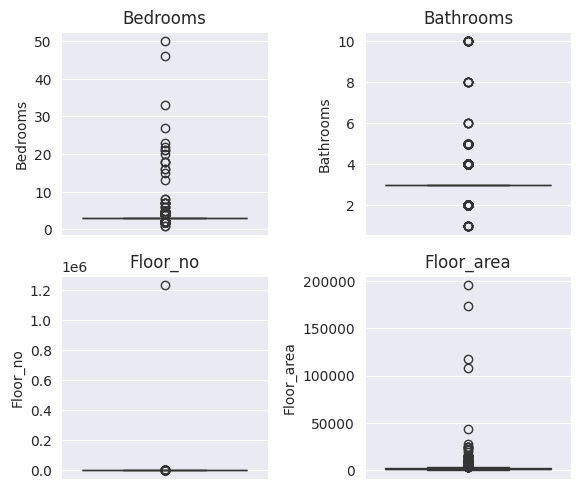

In [ ]:

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 5))

# Plot boxplots for each feature
sns.boxplot(ax=axes[0, 0], y=df['Bedrooms'])
axes[0, 0].set_title('Bedrooms')

sns.boxplot(ax=axes[0, 1], y=df['Bathrooms'])
axes[0, 1].set_title('Bathrooms')

sns.boxplot(ax=axes[1, 0], y=df['Floor_no'])
axes[1, 0].set_title('Floor_no')

sns.boxplot(ax=axes[1, 1], y=df['Floor_area'])
axes[1, 1].set_title('Floor_area')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
count,2925.000000,2925.000000,2.925000e+03,2925.000000,2.925000e+03
mean,3.082393,2.996239,4.265426e+02,1943.029060,1.207955e+07
std,1.765990,0.813901,2.282707e+04,5946.510414,2.834140e+07
min,1.000000,1.000000,1.000000e+00,84.000000,1.050000e+06
25%,3.000000,3.000000,3.000000e+00,1120.000000,4.800000e+06
50%,3.000000,3.000000,4.000000e+00,1392.000000,6.902500e+06
75%,3.000000,3.000000,6.000000e+00,1873.000000,1.050000e+07
max,50.000000,10.000000,1.234567e+06,195840.000000,5.320000e+08


In [ ]:
bathroom_more_then_5 = df[df['Bathrooms'] > 5]
len(bathroom_more_then_5)

26

In [ ]:
df.drop(df[df['Bathrooms'] > 5].index, inplace=True)

In [ ]:
extreme_floor = df[df['Floor_no']>20]
extreme_floor

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
2674,3,3,48,1250.0,chattogram,3800000.0,others


In [ ]:
df.drop(df[df['Floor_no']>20].index, inplace=True)

In [ ]:
len(df[df['Floor_no']>20])

0

In [ ]:
extreme_floor_area = df[df['Floor_area']>4500]
len(extreme_floor_area)

57

In [ ]:
df.drop(df[df['Floor_area']>4500].index, inplace=True)

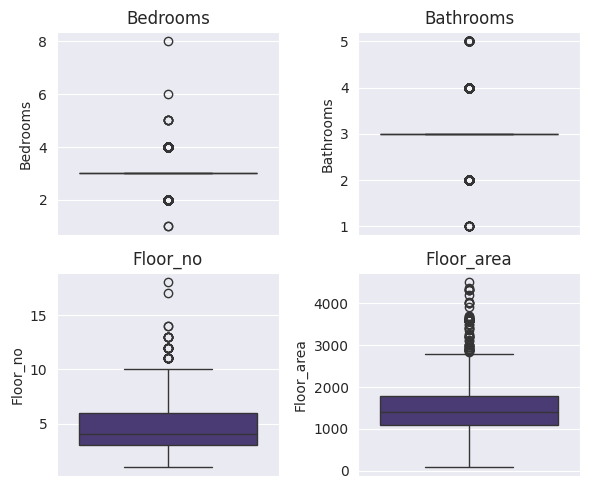

In [ ]:

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 5))

# Plot boxplots for each feature
sns.boxplot(ax=axes[0, 0], y=df['Bedrooms'])
axes[0, 0].set_title('Bedrooms')

sns.boxplot(ax=axes[0, 1], y=df['Bathrooms'])
axes[0, 1].set_title('Bathrooms')

sns.boxplot(ax=axes[1, 0], y=df['Floor_no'])
axes[1, 0].set_title('Floor_no')

sns.boxplot(ax=axes[1, 1], y=df['Floor_area'])
axes[1, 1].set_title('Floor_area')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2841 entries, 0 to 3862
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2841 non-null   int64  
 1   Bathrooms      2841 non-null   int64  
 2   Floor_no       2841 non-null   int64  
 3   Floor_area     2841 non-null   float64
 4   City           2841 non-null   string 
 5   Price_in_taka  2841 non-null   float64
 6   Location       2841 non-null   object 
dtypes: float64(2), int64(3), object(1), string(1)
memory usage: 177.6+ KB


## One Hot Encoding for CAT Features

In [ ]:
dummies_city = pd.get_dummies(df['City'])
dummies_location = pd.get_dummies(df['Location'])

In [ ]:
dummies_location.drop('others', axis='columns')
dummies_city.drop('narayanganj-city',axis='columns')

,chattogram,cumilla,dhaka,gazipur
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
3858,False,False,False,True
3859,False,False,False,True
3860,False,False,False,True
3861,False,False,False,True


In [ ]:
df = pd.concat([df,dummies_city,dummies_location], axis='columns')
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location,chattogram,cumilla,dhaka,...,"West Bagichagoun, Bagichagaon","West Kazipara, Mirpur","West Khulshi R/A, 9 No. North Pahartali Ward","West Khulshi, 9 No. North Pahartali Ward","West Monipur, Mirpur","West Shewrapara, Mirpur","Yakub Future Park Housing, Khulshi","Yakub Nagar Road, 33 No. Firingee Bazaar Ward","Zakir Hossain Road, Khulshi",others
0,3,4,3,1960.0,dhaka,39000000.0,"Gulshan 1, Gulshan",False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,3,3,1,1705.0,dhaka,16900000.0,others,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,3,3,6,1370.0,dhaka,12500000.0,others,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,3,3,4,2125.0,dhaka,20000000.0,"Block L, Bashundhara R-A",False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,3,3,4,2687.0,dhaka,47500000.0,others,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df = df.drop(['Location', 'City'], axis='columns')
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka,chattogram,cumilla,dhaka,gazipur,narayanganj-city,...,"West Bagichagoun, Bagichagaon","West Kazipara, Mirpur","West Khulshi R/A, 9 No. North Pahartali Ward","West Khulshi, 9 No. North Pahartali Ward","West Monipur, Mirpur","West Shewrapara, Mirpur","Yakub Future Park Housing, Khulshi","Yakub Nagar Road, 33 No. Firingee Bazaar Ward","Zakir Hossain Road, Khulshi",others
0,3,4,3,1960.0,39000000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,3,1,1705.0,16900000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,3,6,1370.0,12500000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3,3,4,2125.0,20000000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,3,4,2687.0,47500000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


## 🔍 Observations & Approach:
- Tile and Occupancy status are no use --> drop column✅
- NaN is present in almost every features,implies to missing values, there are 800+ (28% of total) missing values in some features,so we can not drop them --> Impute
- most of the features are in objects --> convert to num
- Bedroom,bathroom,floor_area are in float type,not possible --> convert to integer (first need to remove NAN)
- price column has special character ৳ & , --> need to replace✅

## Dimentinality Reduction
- Too many unique location, OHE will create too many unique location categories,which will result dimensionality curse --> label locations with less then 5 datapoints 'others'✅

## Outliers Handling
- max bathroom number is 10, which is very unusual
- max bedrooms 50
- extreme value of floor no


# Step-3: Model Building 🤖

In [ ]:
X = df.drop(['Price_in_taka'], axis='columns')
X.head(2)

,Bedrooms,Bathrooms,Floor_no,Floor_area,chattogram,cumilla,dhaka,gazipur,narayanganj-city,"1 No Railway Gate, Muradpur",...,"West Bagichagoun, Bagichagaon","West Kazipara, Mirpur","West Khulshi R/A, 9 No. North Pahartali Ward","West Khulshi, 9 No. North Pahartali Ward","West Monipur, Mirpur","West Shewrapara, Mirpur","Yakub Future Park Housing, Khulshi","Yakub Nagar Road, 33 No. Firingee Bazaar Ward","Zakir Hossain Road, Khulshi",others
0,3,4,3,1960.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,3,1,1705.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
y = df['Price_in_taka']
y.head(2)

,Price_in_taka
0,39000000.0
1,16900000.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

## Find best model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+17, tolerance: 4.133e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+17, tolerance: 5.243e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+17, tolerance: 3.988e

,model,best_score,best_params
0,linear_regression,0.150738,"{'copy_X': True, 'fit_intercept': False}"
1,lasso,0.150742,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,-0.898173,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#Step-4: Export the tested model to a pickle file 💾

In [ ]:
# import pickle
# with open('banglore_home_prices_model.pickle','wb') as f:
#     pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))